In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('zgpa_train.csv')

data.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [2]:
price=data.loc[:,'close']
price.head()

0    28.78
1    29.23
2    29.26
3    28.50
4    28.67
Name: close, dtype: float64

In [3]:
#归一化处理
price_norm=price/max(price)
price_norm

0      0.383273
1      0.389266
2      0.389666
3      0.379545
4      0.381808
         ...   
726    0.751099
727    0.750566
728    0.738447
729    0.733120
730    0.722466
Name: close, Length: 731, dtype: float64

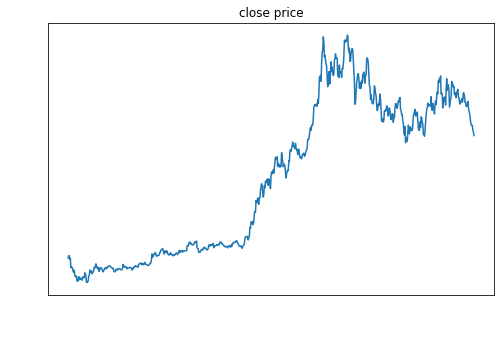

In [4]:
from matplotlib import pyplot as plt
font={'family':'serif',
     'style':'italic',
    'weight':'normal',
      'color':'white',
      'size':16
}

fig1=plt.figure(figsize=(8,5))
plt.plot(price)
plt.title('close price')
plt.xlabel('time',fontdict=font)
plt.ylabel('price',fontdict=font)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')

In [5]:
def extract_data(data,time_step):
    X=[]
    y=[]
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    X=np.array(X)
    X=X.reshape(X.shape[0],X.shape[1],1)
    return X,y

In [6]:
X,y=extract_data(price_norm,time_step=8)
X.shape

(723, 8, 1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
model =Sequential()
model.add(SimpleRNN(units=5,input_shape=(8,1),activation='relu'))
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X,y,batch_size=30,epochs=20)

Epoch 1/20
